# Lösungsansatz aus der Vorlesung

> Als erstes wurde ein Lösungsansatz aus der Vorlesung verfolgt. Dieser führte leider zu einem nicht zufriedenstellendem Ergebnis

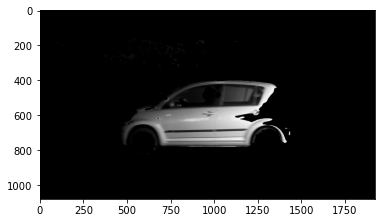

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('../datasets/images/test.jpg')

blur = cv2.blur(img,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)

hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)

low_blue = np.array([60, 40, 0])
high_blue = np.array([255, 220, 255])
mask = cv2.inRange(hsv, low_blue, high_blue)

res = cv2.bitwise_and(img,img, mask= mask)

gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap = 'gray')

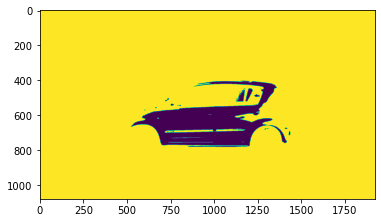

In [3]:
(t,im_seg)=cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY_INV) 
plt.gray
plt.imshow(im_seg)

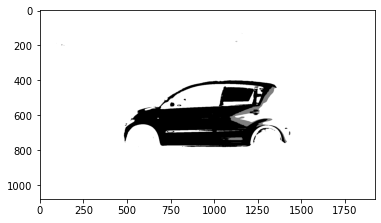

In [4]:
markers=np.zeros(gray.shape, dtype='int32')
markers+=(gray>220) * 1
markers+=(gray<40) * 2
plt.gray
plt.imshow(markers, cmap='gray')

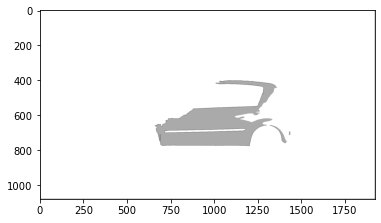

In [5]:
seg = cv2.watershed(cv2.merge([gray,gray,gray]), markers) 
plt.imshow(seg, cmap = 'gray')

### Der watershed Filter schneiden die vordere Hälfte des Auto weg. Somit kann keine Länge berechnet werden. Für die Höhe wäre diese Bild noch zu gebrauchen

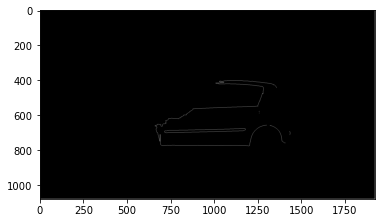

In [6]:
boundary = np.zeros(gray.shape, dtype='uint8') 
boundary[seg==-1] = 1
plt.imshow(boundary, cmap= 'gray')

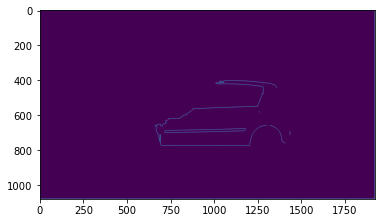

In [7]:
plt.imshow(boundary)

In [12]:
(nr, cc)=cv2.connectedComponents(boundary)

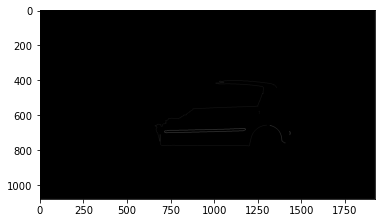

In [13]:
plt.imshow(cc, cmap='gray')

## Da auch connected Components zu keinem besseren Ergebnis führt, wurde ein anderer Lösungsansatz angewandt.